Mandelbrot set implementation

In [121]:
import cmath
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import qmc
import sympy

In [27]:
# def mandelbrot_check(c, max_iterations):
#     z = 0
#     for n in range(max_iterations):
#         z = z**2 + c
#     return abs(z) <= 2

def mandelbrot_iterations(c, max_iterations):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iterations:
        z = z**2 + c
        n += 1
    return n

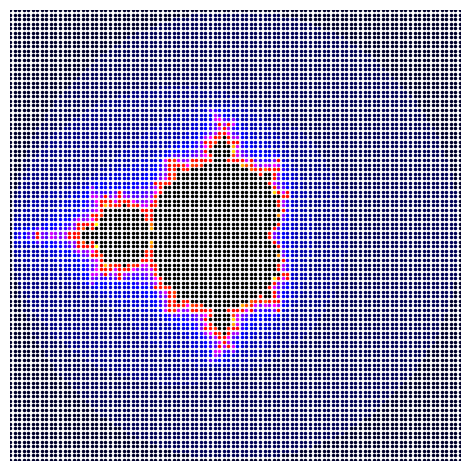

In [4]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
x_grid, y_grid = np.meshgrid(x, y)

complex_grid = x_grid - y_grid * 1j
max_iterations = 300

c_list_in_x = []
c_list_in_y = []

c_list_out_x = []
c_list_out_y = []
color_out = []
for c_row in complex_grid:
    for c in c_row:
        n =  mandelbrot_iterations(c, max_iterations)
        if n == max_iterations:
            c_list_in_x.append(c.real)
            c_list_in_y.append(c.imag)
        else:
            percentage_diverge = (n/max_iterations)*100
            c_list_out_x.append(c.real)
            c_list_out_y.append(c.imag)
            color_out.append(percentage_diverge)

for i in range(len(color_out)):
    if color_out[i] <= 2:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = (0,0,color_out[i]/2))
    elif color_out[i] <= 4:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = ((color_out[i]-2)/2,0,1))
    else:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = (1,(color_out[i]-4)/96,0))
    

plt.plot(c_list_in_x,c_list_in_y, marker = 'o', ls = 'none', markersize = 1.5, color = (0,0,0))
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

In [16]:
def area_mandelbrot(iterations, samples, tot_area, max_iterations, xmin = -2, xmax = 2, ymin = -2, ymax = 2):
    area_s = []
    for s in range(samples):
        in_num = 0
        for i in range(iterations):
            x, y = np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax)
            c = x - y * 1j
            n =  mandelbrot_iterations(c, max_iterations)
            if n == max_iterations:
                in_num += 1
        area_s.append(in_num/iterations)

    return sum(area_s)/len(area_s)*tot_area

In [6]:
max_iterations = 300

i = 500
s = 500
tot_A = (2- (-2))* (2- (-2))

print(area_mandelbrot(i, s, tot_A, max_iterations))

iter = 1002
sample = 1002

i = 500
y_s = []
x_s = []
for s in range(1, sample, 50):
    print(f's: {s}')
    y_s.append(area_mandelbrot(i, s, tot_A, max_iterations))
    x_s.append(s)

s = 500
y_i = []
x_i = []
for i in range(1, iter, 50):
    print(f'i: {i}')
    y_i.append(area_mandelbrot(i, s, tot_A, max_iterations))
    x_i.append(i)

plt.plot(x_s, y_s)
plt.title('Area for different sample sizes')
plt.xlabel('Sample size')
plt.show()

plt.plot(x_i, y_i)
plt.title('Area for different iteration sizes')
plt.xlabel('Number of iterations')
plt.show()

1.5286399999999996
s: 1
s: 51
s: 101
s: 151
s: 201
s: 251
s: 301


KeyboardInterrupt: 

In [17]:
max_iterations = 300
tot_A = (2- (-2))* (2- (-2))
iter = 202
sample = 202

# accurate = 0
# s_good = 0
# i_good = 0

A_is = []
tot_samples = []
for i in range(10, iter, 50):
    for s in range(1, sample):
        A_is.append(area_mandelbrot(i, s, tot_A, max_iterations))
        tot_samples.append(s)

print(A_is)

# for j in len(A_is):
#     plt.plot(tot_samples, A_is[j], label = f'iterations = {i}')
# plt.legend()
# plt.title('Area for different sample sizes')
# plt.xlabel('Number of samples')
# plt.ylabel('area estimation of the mandelbrot')
#         if accurate < A_is:
#             accurate = A_is
#             i_good = i
#             s_good = s

# print(f"i: {i_good}")
# print(f"s: {s_good}")
# print(f"accuracy: {accurate}")

# plt.plot(A_is, tot_samples)
# plt.title('Area for different sample sizes')
# plt.xlabel('Accuracy of area calc')
plt.show()


[3.2, 1.6, 1.0666666666666667, 0.4, 1.28, 0.8000000000000002, 2.5142857142857147, 1.6, 1.2444444444444445, 0.96, 1.4545454545454548, 1.4666666666666666, 1.3538461538461541, 1.7142857142857142, 2.1333333333333333, 1.9000000000000001, 1.035294117647059, 1.688888888888889, 1.0105263157894737, 1.4400000000000004, 1.2952380952380953, 1.6000000000000005, 1.6695652173913047, 1.7333333333333332, 1.7920000000000007, 1.8461538461538465, 1.4222222222222225, 1.6571428571428573, 2.0965517241379312, 1.4400000000000006, 1.445161290322581, 1.4000000000000006, 1.4060606060606065, 1.6000000000000005, 1.371428571428572, 1.3777777777777782, 1.686486486486487, 1.9789473684210528, 1.3948717948717955, 1.2800000000000007, 1.4829268292682933, 1.4476190476190482, 1.1534883720930238, 1.5636363636363635, 1.635555555555556, 1.4608695652173918, 1.1574468085106386, 1.666666666666667, 1.795918367346939, 1.6959999999999997, 1.3176470588235298, 1.5692307692307688, 1.781132075471698, 1.4814814814814818, 1.07636363636363

In [108]:
def hypercube_area_mandelbrot(samples, tot_area, max_iterations, xmin = -2, xmax = 2, ymin = -2, ymax = 2):
    for s in range(1, samples):
        sampler = qmc.LatinHypercube(d = 2)
        sample = sampler.random(n = s)
        l_bounds = [xmin, ymin]
        u_bounds = [xmax, ymax]
        sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
        x_list = sample_scaled[:, 0]
        y_list = sample_scaled[:, 1]
        # x_list = xmin + sample[:, 0] * (xmax - xmin)
        # y_list = ymin + sample[:, 1] * (ymax - ymin)
    
    area_s = []
    for ax in range(len(x_list)):
        in_num = 0
        c = x_list[ax] - y_list[ax] * 1j
        n =  mandelbrot_iterations(c, max_iterations)
        if n == max_iterations:
            in_num += 1
        area_s.append(in_num)

    return sum(area_s)/len(area_s)*tot_area

In [127]:
def ortho_area_mandelbrot(samples, tot_area, max_iterations, xmin = -2, xmax = 2, ymin = -2, ymax = 2):
    # for s in range(4, samples):
    for s in sympy.primerange(0, np.sqrt(samples)):
        s_square = s**2
        if s_square < samples:
            sampler = qmc.LatinHypercube(d = 2, strength = 2)
            sample = sampler.random(n = s_square)
            l_bounds = [xmin, ymin]
            u_bounds = [xmax, ymax]
            sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
            x_list = sample_scaled[:, 0]
            y_list = sample_scaled[:, 1]
        # x_list = xmin + sample[:, 0] * (xmax - xmin)
        # y_list = ymin + sample[:, 1] * (ymax - ymin)
    
    area_s = []
    for ax in range(len(x_list)):
        in_num = 0
        c = x_list[ax] - y_list[ax] * 1j
        n =  mandelbrot_iterations(c, max_iterations)
        if n == max_iterations:
            in_num += 1
        area_s.append(in_num)

    return sum(area_s)/len(area_s)*tot_area

In [131]:
max_iterations = 300

i = 50
s = 200
tot_A = (2- (-2))* (2- (-2))

print(area_mandelbrot(i, s, tot_A, max_iterations))
print(hypercube_area_mandelbrot(s, tot_A, max_iterations))
print(ortho_area_mandelbrot(s, tot_A, max_iterations))


1.7071999999999985
1.92964824120603
1.514792899408284


hoe heet wat? is samples, een groep punten aka iterations of is samples 1 en voor meerdere iterations dus dat is dan de groep.